<a href="https://colab.research.google.com/github/DataDoggo215/Predicting_BitcoinPrices/blob/main/BitPredict_time_series_forecastng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Will Bitcoin prices remain on the downward trend or will it go back up?

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://finance.yahoo.com/quote/BTC-USD/. I downloaded the price data and uploaded it to my google drive in a csv format.

#Exploratory Data Analysis

In [ ]:
#Mount to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Import with pandas
import pandas as pd 
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv('/content/gdrive/My Drive/BTC_prices.csv',
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas column 1 is a datetime 

df.head()

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-23,19986.607422,21135.761719,19950.117188,21085.876953,21085.876953,26188097173
2022-06-24,21084.648438,21472.917969,20777.511719,21231.656250,21231.656250,24957784918
2022-06-25,21233.609375,21520.914063,20964.585938,21502.337891,21502.337891,18372538715
2022-06-26,21496.494141,21783.724609,21016.269531,21027.294922,21027.294922,18027170497
2022-06-27,21028.238281,21478.089844,20620.199219,20735.478516,20735.478516,20965695707


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2841 entries, 2014-09-17 to 2022-06-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2841 non-null   float64
 1   High       2841 non-null   float64
 2   Low        2841 non-null   float64
 3   Close      2841 non-null   float64
 4   Adj Close  2841 non-null   float64
 5   Volume     2841 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 155.4 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2841 entries, 2014-09-17 to 2022-06-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2841 non-null   float64
 1   High       2841 non-null   float64
 2   Low        2841 non-null   float64
 3   Close      2841 non-null   float64
 4   Adj Close  2841 non-null   float64
 5   Volume     2841 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 155.4 KB


In [ ]:
len(df)

2841

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Adj Close"]).rename(columns={"Adj Close": "Price"})
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


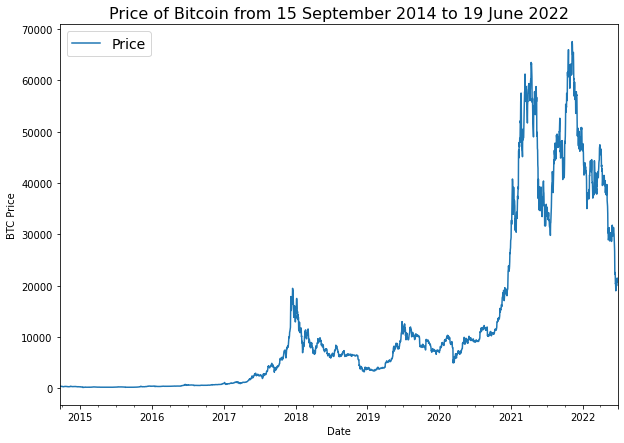

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 15 September 2014 to 19 June 2022", fontsize=16)
plt.legend(fontsize=14);

Importing time series data with Python's CSV module

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/gdrive/My Drive/BTC_prices.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings)
    btc_price.append(float(line[5])) # get the adj closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 9, 17, 0, 0),
  datetime.datetime(2014, 9, 18, 0, 0),
  datetime.datetime(2014, 9, 19, 0, 0),
  datetime.datetime(2014, 9, 20, 0, 0),
  datetime.datetime(2014, 9, 21, 0, 0),
  datetime.datetime(2014, 9, 22, 0, 0),
  datetime.datetime(2014, 9, 23, 0, 0),
  datetime.datetime(2014, 9, 24, 0, 0),
  datetime.datetime(2014, 9, 25, 0, 0),
  datetime.datetime(2014, 9, 26, 0, 0)],
 [457.334015,
  424.440002,
  394.79599,
  408.903992,
  398.821014,
  402.152008,
  435.790985,
  423.204987,
  411.574005,
  404.424988])

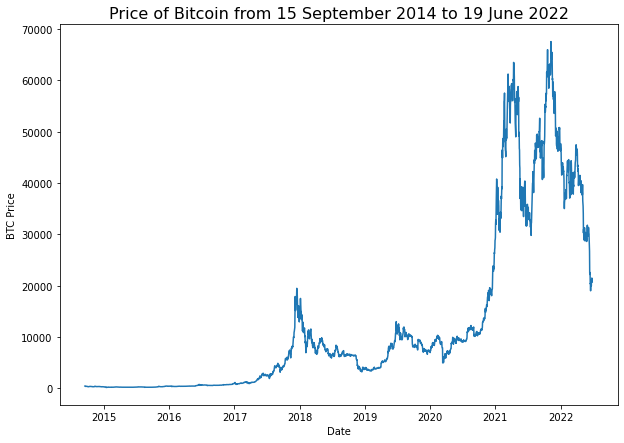

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
# import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 15 September 2014 to 19 June 2022", fontsize=16)
plt.xlabel("Date");

**Format data part 1: Create train and test sets of our time series data**

⚠ Wrong Way to do it!

In [ ]:
bitcoin_prices[:5]

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985, 423.204987, 411.574005, 404.424988]))

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2272,), (569,), (2272,), (569,))

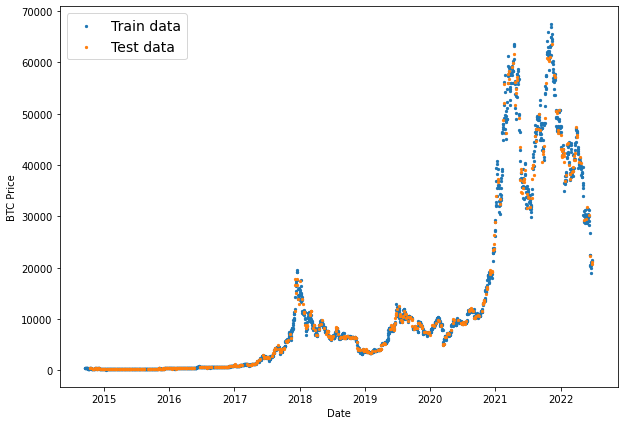

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

✅ Correct way to do split

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2272, 569, 2272, 569)

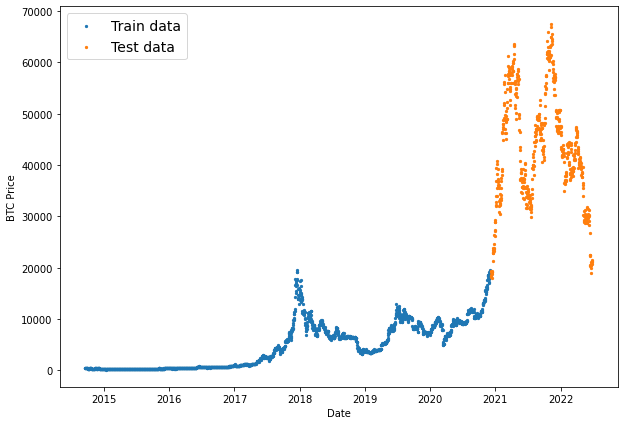

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

Let's create a plotting function so we don't have to do it each time.

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None 
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

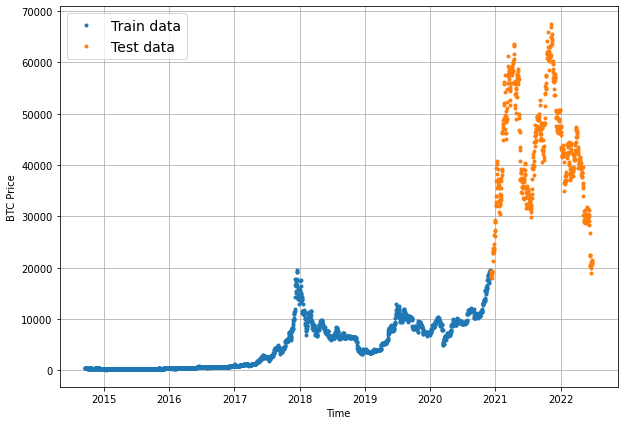

In [ ]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

#Modeling

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Horizon = number of timesteps into the future we're going to predict

Window size = number of timesteps we're going to use to predict horizon

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

Modelling experiments we're running:

*   0 Naïve model (baseline)
*   1 Dense model, horizon = 1, window = 7
*   2 Same as 1, horizon = 1, window = 30
*   3 Same as 1, horizon = 7, window = 30
*   4 Conv1D
*   5 LSTM
*   6 Same as 1 (but with multivariate data)
*   7 N-BEATs Algorithm
*   8 Ensemble (multiple models optimized on different loss functions)
*   9 Future prediction model (model to predict future values)
*   10 Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)

In [ ]:
y_test[:10]

array([19345.121094, 19191.630859, 18321.144531, 18553.916016,
       18264.992188, 18058.904297, 18803.65625 , 19142.382813,
       19246.644531, 19417.076172])

In [ ]:
# Create a naive forecast 
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([19345.121094, 19191.630859, 18321.144531, 18553.916016,
        18264.992188, 18058.904297, 18803.65625 , 19142.382813,
        19246.644531, 19417.076172]),
 array([20471.482422, 19017.642578, 20553.271484, 20599.537109,
        20710.597656, 19987.029297, 21085.876953, 21231.65625 ,
        21502.337891, 21027.294922]))

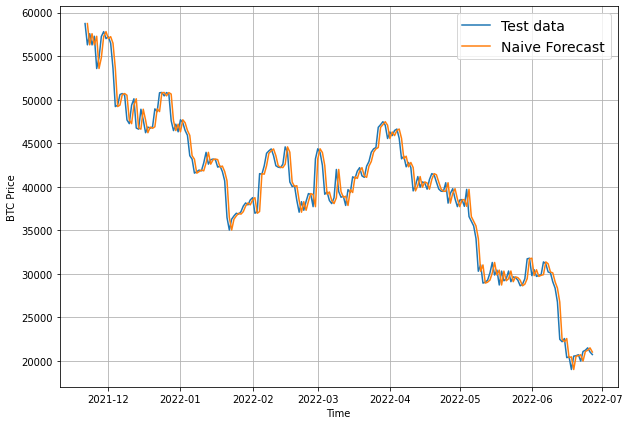

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

**Time Series Model Evaluation**

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

A few common regression metrics (which can also be used for time series forecasting):

*   MAE - mean absolute error
*   MSE - mean squared error
*   RMSE - root mean square error
*   MAPE/sMAPE - (symmetric) mean absolute percentage error
*   MASE - mean absolute scaled error

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [ ]:
# Test MASE (this value should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9984565781191388

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 1242.564,
 'mape': 2.9622917,
 'mase': 0.9984566,
 'mse': 2915892.2,
 'rmse': 1707.5984}

In [ ]:
naive_forecast[-10:]

array([20471.482422, 19017.642578, 20553.271484, 20599.537109,
       20710.597656, 19987.029297, 21085.876953, 21231.65625 ,
       21502.337891, 21027.294922])

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=43084.045193145874>

In [ ]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=18058.904297>,
 <tf.Tensor: shape=(), dtype=float64, numpy=67566.828125>)

Resource for other time series forecasting modeling: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

**Creating windows for our dataset**

We window our time series dataset to turn our data into a supervised learning problem.

In [ ]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [457.334015, 424.440002, 394.79599, 408.903992, 398.821014, 402.152008, 435.790985] to predict this: 423.204987


In [ ]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We could create a a python loop to create windows for our entire data set, but there are better methods for larger data. To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html. We could also do something similiar with keras: https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [ ]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2834, 2834)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] -> Label: [423.204987]
Window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987] -> Label: [411.574005]
Window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005] -> Label: [404.424988]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [19017.642578 20553.271484 20599.537109 20710.597656 19987.029297
 21085.876953 21231.65625 ] -> Label: [21502.337891]
Window: [20553.271484 20599.537109 20710.597656 19987.029297 21085.876953
 21231.65625  21502.337891] -> Label: [21027.294922]
Window: [20599.537109 20710.597656 19987.029297 21085.876953 21231.65625
 21502.337891 21027.294922] -> Label: [20735.478516]


**Turning windows into training and test sets**

In [ ]:
full_windows[:5], full_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]), array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2267, 567, 2267, 567)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]), array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [ ]:
test_windows[:5], test_labels[:5]

(array([[18802.998047, 19201.091797, 19445.398438, 18699.765625,
         19154.230469, 19345.121094, 19191.630859],
        [19201.091797, 19445.398438, 18699.765625, 19154.230469,
         19345.121094, 19191.630859, 18321.144531],
        [19445.398438, 18699.765625, 19154.230469, 19345.121094,
         19191.630859, 18321.144531, 18553.916016],
        [18699.765625, 19154.230469, 19345.121094, 19191.630859,
         18321.144531, 18553.916016, 18264.992188],
        [19154.230469, 19345.121094, 19191.630859, 18321.144531,
         18553.916016, 18264.992188, 18058.904297]]), array([[18321.144531],
        [18553.916016],
        [18264.992188],
        [18058.904297],
        [18803.65625 ]]))

In [ ]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation               
], name="model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 4s 43ms/step - loss: 1141.7571 - mae: 1141.7571 - mse: 3844334.5000 - val_loss: 5534.4888 - val_mae: 5534.4888 - val_mse: 40289984.0000
Epoch 2/100
18/18 [==============================] - 0s 27ms/step - loss: 361.5015 - mae: 361.5015 - mse: 426891.8438 - val_loss: 2394.1025 - val_mae: 2394.1025 - val_mse: 9579794.0000
Epoch 3/100
18/18 [==============================] - 0s 27ms/step - loss: 245.3075 - mae: 245.3075 - mse: 238743.4844 - val_loss: 2185.2515 - val_mae: 2185.2515 - val_mse: 8047751.5000
Epoch 4/100
18/18 [==============================] - 1s 32ms/step - loss: 225.9497 - mae: 225.9497 - mse: 206923.6094 - val_loss: 2139.4424 - val_mae: 2139.4424 - val_mse: 7705615.5000
Epoch 5/100
18/18 [==============================] - 0s 28ms/step - loss: 217.5811 - mae: 217.5811 - mse: 195373.4844 - val_loss: 1927.1389 - val_mae: 1927.1389 - val_mse: 6246928.5000
Epoch 6/100
18/18 [==============================] - 0s 28ms/step - los

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1280.4904 - mae: 1280.4904 - mse: 3068628.0000


[1280.4903564453125, 1280.4903564453125, 3068628.0]

In [ ]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1255.2302 - mae: 1255.2302 - mse: 2976484.2500


[1255.230224609375, 1255.230224609375, 2976484.25]

**Making forecasts with a model (on the test dataset)**

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows) 
len(model_1_preds), model_1_preds[:10]

(567, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([19263.84 , 18432.877, 18513.443, 18305.508, 18095.027, 18641.625,
        19143.006, 19272.25 , 19412.125, 21077.07 ], dtype=float32)>)

In [ ]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([567]), TensorShape([567]))

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 1255.2301,
 'mape': 2.9977276,
 'mase': 1.0080991,
 'mse': 2976484.0,
 'rmse': 1725.2489}

In [ ]:
naive_results

{'mae': 1242.564,
 'mape': 2.9622917,
 'mase': 0.9984566,
 'mse': 2915892.2,
 'rmse': 1707.5984}

In [ ]:
test_labels.shape

(567, 1)

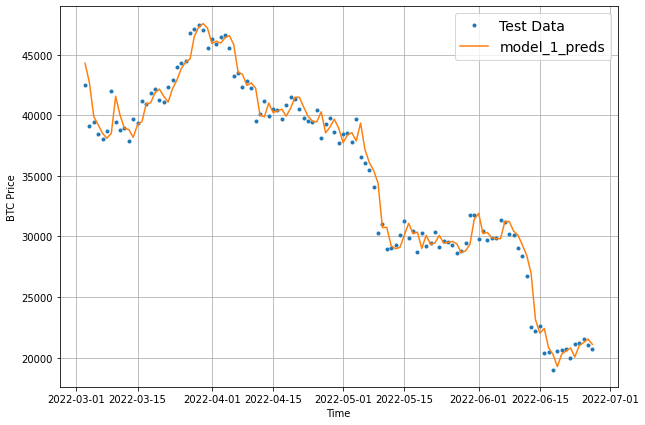

In [ ]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset, 
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [ ]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2811, 2811)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2248, 563, 2248, 563)

In [ ]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1360.9095


1360.9095458984375

In [ ]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1360.9095


1360.9095458984375

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [ ]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([563]), TensorShape([563]))

In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 1360.9097,
 'mape': 3.2326345,
 'mase': 1.0875204,
 'mse': 3324329.8,
 'rmse': 1823.2744}

In [ ]:
model_1_results

{'mae': 1255.2301,
 'mape': 2.9977276,
 'mase': 1.0080991,
 'mse': 2976484.0,
 'rmse': 1725.2489}

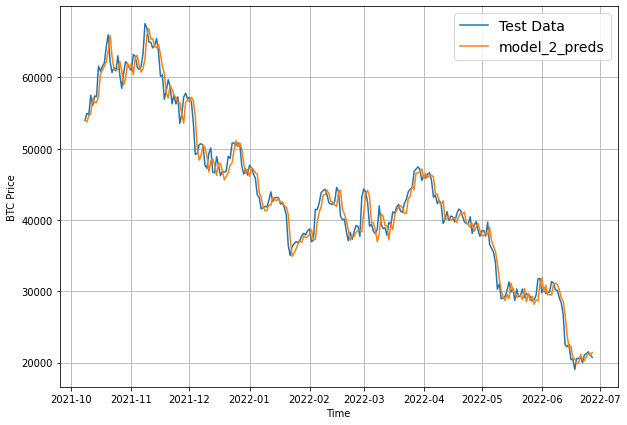

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [ ]:
prices[:10]

array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985, 423.204987, 411.574005, 404.424988])

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2805, 2805)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2244, 561, 2244, 561)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 2915.8025


2915.802490234375

In [ ]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 2701.8379


2701.837890625

In [ ]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[19031.568, 19048.041, 19796.111, 18637.318, 19496.48 , 19277.709,
        19132.92 ],
       [19001.555, 18985.871, 19321.838, 18754.117, 19299.549, 19025.352,
        19280.031],
       [18757.229, 18990.486, 18921.31 , 18700.918, 18639.738, 18708.107,
        19084.1  ],
       [18013.857, 18435.629, 18362.045, 18123.459, 18144.611, 18381.592,
        18416.236],
       [17716.145, 17927.637, 18006.086, 17520.168, 18068.94 , 18328.12 ,
        18047.82 ]], dtype=float32)>

In [ ]:
model_2_results

{'mae': 1360.9097,
 'mape': 3.2326345,
 'mase': 1.0875204,
 'mse': 3324329.8,
 'rmse': 1823.2744}

In [ ]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape

(TensorShape([561, 7]), TensorShape([563]), TensorShape([567]))

In [ ]:
# Evaluate model_3 results (these are going multi-dimensional because we're trying to predict more than one timestep at a time)
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  607.99384,   428.0706 ,   789.3301 ,  1558.142  ,  2606.938  ,
         2950.3235 ,  3060.8013 ,  3211.932  ,  3536.217  ,  2648.3113 ,
         1360.1842 ,   769.5999 ,   784.5011 ,  1110.9401 ,  1559.3611 ,
         1696.2897 ,  2684.8708 ,  3085.1973 ,  2859.0393 ,  2474.3372 ,
         2465.5854 ,  2760.022  ,  3411.2058 ,  3438.9978 ,  4207.5386 ,
         5354.8945 ,  4469.012  ,  4320.9443 ,  4655.766  ,  3774.8855 ,
         2638.4001 ,  2371.6267 ,  3907.52   ,  5301.5913 ,  4604.5425 ,
         1960.2194 ,  1228.216  ,  1223.1613 ,  2988.529  ,  3728.437  ,
         3876.4617 ,  3232.7654 ,  2942.9414 ,  3136.4868 ,  3849.5276 ,
         1185.6111 ,  1305.0323 ,  1059.2268 ,  1366.008  ,  1538.4082 ,
         2141.6597 ,  3909.8083 ,  3071.1792 ,  2541.49   ,  2806.6628 ,
         3209.2195 ,  5511.68   ,  5572.221  ,  5086.505  ,  5784.3594 ,
         6145.9556 ,  6693.161  ,  8166.362  ,  3964.2356 ,  1318.2673 ,
         1847.1495 ,  1335.3945 ,  2494.3606

**Make our evaluation function work for larger horizons**

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 2701.8379


2701.837890625

In [ ]:
tf.reduce_mean(model_3_results["mae"]).numpy()

2701.838

In [ ]:
model_2_results["mae"].ndim

0

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 2701.838,
 'mape': 6.4875126,
 'mase': 2.1535518,
 'mse': 13165650.0,
 'rmse': 3095.1519}

In [ ]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[19031.568, 19048.041, 19796.111, 18637.318, 19496.48 , 19277.709,
        19132.92 ],
       [19001.555, 18985.871, 19321.838, 18754.117, 19299.549, 19025.352,
        19280.031],
       [18757.229, 18990.486, 18921.31 , 18700.918, 18639.738, 18708.107,
        19084.1  ],
       [18013.857, 18435.629, 18362.045, 18123.459, 18144.611, 18381.592,
        18416.236],
       [17716.145, 17927.637, 18006.086, 17520.168, 18068.94 , 18328.12 ,
        18047.82 ]], dtype=float32)>

In [ ]:
test_labels[:]

array([[18321.144531, 18553.916016, 18264.992188, ..., 18803.65625 ,
        19142.382813, 19246.644531],
       [18553.916016, 18264.992188, 18058.904297, ..., 19142.382813,
        19246.644531, 19417.076172],
       [18264.992188, 18058.904297, 18803.65625 , ..., 19246.644531,
        19417.076172, 21310.597656],
       ...,
       [20553.271484, 20599.537109, 20710.597656, ..., 21085.876953,
        21231.65625 , 21502.337891],
       [20599.537109, 20710.597656, 19987.029297, ..., 21231.65625 ,
        21502.337891, 21027.294922],
       [20710.597656, 19987.029297, 21085.876953, ..., 21502.337891,
        21027.294922, 20735.478516]])

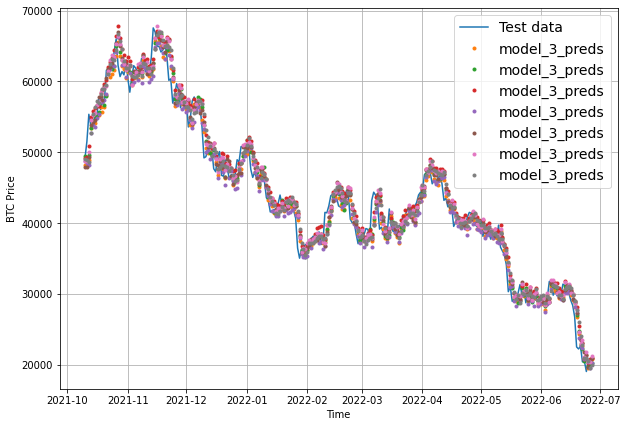

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

In [ ]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([19031.568, 19048.041, 19796.111, 18637.318, 19496.48 , 19277.709,
       19132.92 ], dtype=float32)>

In [ ]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=19202.879>

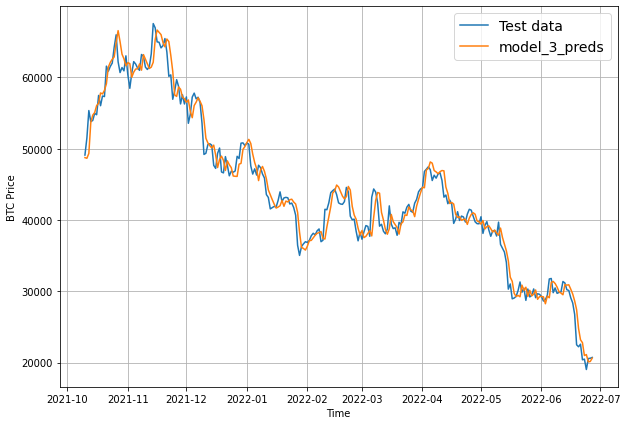

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-", 
                 label="model_3_preds")

**Which model is performing the best?**

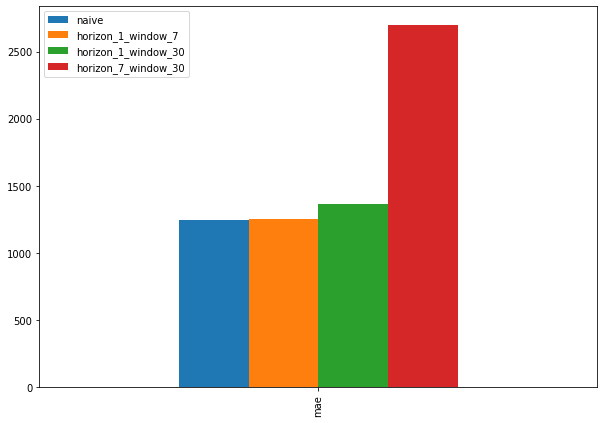

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");


Naive so far seems to be doing the best. This could be due to the pressence of autocorrelation in the data.  For more on how autocorrelation influences a model's predictions, see the article: https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

## Model 4: Conv1D

In [ ]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2834, 2834)

In [ ]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2267, 2267, 567, 567)

In [ ]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

To use the Conv1D layer, we need an input shape of: (batch_size, timesteps, input_dim)...

However our data isn't in that shape yet...

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [ ]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[457.334]
 [424.44 ]
 [394.796]
 [408.904]
 [398.821]
 [402.152]
 [435.791]]


In [ ]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)                      
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - 10s 48ms/step - loss: 1820.8450 - val_loss: 5570.1406
Epoch 2/100
18/18 [==============================] - 1s 37ms/step - loss: 446.6735 - val_loss: 2391.8257
Epoch 3/100
18/18 [==============================] - 1s 37ms/step - loss: 245.7065 - val_loss: 2129.5198
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 235.9845 - val_loss: 2132.9277
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 232.6687 - val_loss: 2202.4294
Epoch 6/100
18/18 [==============================] - 1s 38ms/step - loss: 226.0155 - val_loss: 2012.0022
Epoch 7/100
18/18 [==============================] - 1s 36ms/step - loss: 219.2031 - val_loss: 2008.0815
Epoch 8/100
18/18 [==============================] - 1s 36ms/step - loss: 214.9141 - val_loss: 1964.7612
Epoch 9/100
18/18 [==============================] - 1s 37ms/step - loss: 212.0290 - val_loss: 1951.6442
Epoch 10/100
18/18 [==============================] - 1

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 1276.1792


1276.17919921875

In [ ]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1259.1113


1259.111328125

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19268.059, 18492.56 , 18521.148, 18333.748, 18105.143, 18653.137,
       19135.299, 19278.836, 19432.21 , 21029.512], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 1259.1115,
 'mape': 3.0071664,
 'mase': 1.0112163,
 'mse': 2992638.8,
 'rmse': 1729.9244}

##Model 5: RNN (LSTM)

In [ ]:
train_windows[:5]

array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985],
       [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
        435.790985, 423.204987],
       [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
        423.204987, 411.574005],
       [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
        411.574005, 404.424988],
       [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
        404.424988, 399.519989]])

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 3544.6450INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 114ms/step - loss: 3544.6450 - val_loss: 21449.2559
Epoch 2/100
10/18 [===============>..............] - ETA: 0s - loss: 1825.6530INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 119ms/step - loss: 1338.7717 - val_loss: 2089.6570
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 331.5549 - val_loss: 2214.8789
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 251.0039 - val_loss: 2285.0183
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 233.5296 - val_loss: 2116.6174
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 229.6568 - val_loss: 2091.7095
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 226.4309 - val_loss: 2092.0967
Epoch 8/100
10/18 [===============>..............] - ETA: 0s - loss: 231.4473INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 228.5181 - val_loss: 2080.9404
Epoch 9/100
11/18 [=================>............] - ETA: 0s - loss: 230.9481INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 227.2435 - val_loss: 2069.6272
Epoch 10/100
11/18 [=================>............] - ETA: 0s - loss: 227.5362INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 224.1931 - val_loss: 1955.1874
Epoch 11/100
18/18 [==============================] - 0s 7ms/step - loss: 224.5340 - val_loss: 2054.2820
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 223.9761 - val_loss: 2029.5312
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 222.3971 - val_loss: 2025.6603
Epoch 14/100
18/18 [==============================] - 0s 8ms/step - loss: 221.8460 - val_loss: 2002.6627
Epoch 15/100
18/18 [==============================] - 0s 7ms/step - loss: 218.6610 - val_loss: 1988.7399
Epoch 16/100
18/18 [==============================] - 0s 7ms/step - loss: 218.3832 - val_loss: 1971.9240
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 215.0724 - val_loss: 1957.8693
Epoch 18/100
11/18 [=================>............] - ETA: 0s - loss: 214.3825INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 212.4696 - val_loss: 1947.0963
Epoch 19/100
18/18 [==============================] - ETA: 0s - loss: 210.7712INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 210.7712 - val_loss: 1929.2229
Epoch 20/100
18/18 [==============================] - 0s 7ms/step - loss: 209.4916 - val_loss: 1950.0287
Epoch 21/100
18/18 [==============================] - 0s 8ms/step - loss: 208.4530 - val_loss: 1998.6581
Epoch 22/100
10/18 [===============>..............] - ETA: 0s - loss: 206.3540INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 120ms/step - loss: 205.9344 - val_loss: 1927.6748
Epoch 23/100
10/18 [===============>..............] - ETA: 0s - loss: 198.5460INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 203.2699 - val_loss: 1860.7699
Epoch 24/100
12/18 [===================>..........] - ETA: 0s - loss: 196.9615INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 200.9819 - val_loss: 1844.7312
Epoch 25/100
12/18 [===================>..........] - ETA: 0s - loss: 208.0093INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 198.1072 - val_loss: 1813.4880
Epoch 26/100
11/18 [=================>............] - ETA: 0s - loss: 187.9236INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 123ms/step - loss: 194.4025 - val_loss: 1785.6036
Epoch 27/100
11/18 [=================>............] - ETA: 0s - loss: 199.4604INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 198.0427 - val_loss: 1763.5267
Epoch 28/100
11/18 [=================>............] - ETA: 0s - loss: 191.4215INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 192.8047 - val_loss: 1744.1597
Epoch 29/100
11/18 [=================>............] - ETA: 0s - loss: 180.9697INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 186.6695 - val_loss: 1730.7793
Epoch 30/100
10/18 [===============>..............] - ETA: 0s - loss: 189.3451INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 121ms/step - loss: 185.3163 - val_loss: 1720.9796
Epoch 31/100
11/18 [=================>............] - ETA: 0s - loss: 187.2488INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 183.8020 - val_loss: 1688.9294
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 189.8778INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 187.4065 - val_loss: 1670.3267
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 189.5070 - val_loss: 1670.9436
Epoch 34/100
10/18 [===============>..............] - ETA: 0s - loss: 174.3913INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 121ms/step - loss: 177.3402 - val_loss: 1640.6068
Epoch 35/100
10/18 [===============>..............] - ETA: 0s - loss: 180.0514INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 175.1818 - val_loss: 1628.2937
Epoch 36/100
10/18 [===============>..............] - ETA: 0s - loss: 168.6548INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 173.4623 - val_loss: 1610.7013
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 176.7377 - val_loss: 1625.8241
Epoch 38/100
11/18 [=================>............] - ETA: 0s - loss: 170.8810INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 172.7304 - val_loss: 1589.0143
Epoch 39/100
10/18 [===============>..............] - ETA: 0s - loss: 168.0074INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 122ms/step - loss: 167.7813 - val_loss: 1568.1156
Epoch 40/100
10/18 [===============>..............] - ETA: 0s - loss: 158.9682INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 168.0578 - val_loss: 1566.5085
Epoch 41/100
10/18 [===============>..............] - ETA: 0s - loss: 171.2283INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 165.6567 - val_loss: 1540.4451
Epoch 42/100
11/18 [=================>............] - ETA: 0s - loss: 159.6884INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 166.5270 - val_loss: 1528.5527
Epoch 43/100
10/18 [===============>..............] - ETA: 0s - loss: 163.0487INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 123ms/step - loss: 162.1939 - val_loss: 1516.8308
Epoch 44/100
11/18 [=================>............] - ETA: 0s - loss: 165.1133INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 161.3133 - val_loss: 1504.7167
Epoch 45/100
10/18 [===============>..............] - ETA: 0s - loss: 162.6472INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 160.2403 - val_loss: 1497.8080
Epoch 46/100
10/18 [===============>..............] - ETA: 0s - loss: 152.6191INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 123ms/step - loss: 158.6691 - val_loss: 1485.7974
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 158.8139 - val_loss: 1505.0647
Epoch 48/100
11/18 [=================>............] - ETA: 0s - loss: 157.2542INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 109ms/step - loss: 159.1195 - val_loss: 1468.2903
Epoch 49/100
11/18 [=================>............] - ETA: 0s - loss: 160.9406INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 156.5113 - val_loss: 1467.4264
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 156.4141 - val_loss: 1484.5328
Epoch 51/100
12/18 [===================>..........] - ETA: 0s - loss: 156.6630INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 160.3875 - val_loss: 1449.6476
Epoch 52/100
 9/18 [==============>...............] - ETA: 0s - loss: 153.3849INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 127ms/step - loss: 155.0892 - val_loss: 1449.2887
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 164.9211 - val_loss: 1492.3978
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 157.4700 - val_loss: 1461.7094
Epoch 55/100
10/18 [===============>..............] - ETA: 0s - loss: 150.7429INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 155.5091 - val_loss: 1435.9822
Epoch 56/100
11/18 [=================>............] - ETA: 0s - loss: 153.2164INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 153.9764 - val_loss: 1424.0164
Epoch 57/100
10/18 [===============>..............] - ETA: 0s - loss: 158.6275INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 120ms/step - loss: 152.8873 - val_loss: 1423.4451
Epoch 58/100
18/18 [==============================] - 0s 14ms/step - loss: 152.2698 - val_loss: 1437.1451
Epoch 59/100
11/18 [=================>............] - ETA: 0s - loss: 148.3505INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 108ms/step - loss: 151.5135 - val_loss: 1413.6842
Epoch 60/100
11/18 [=================>............] - ETA: 0s - loss: 148.3800INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 151.2063 - val_loss: 1406.5192
Epoch 61/100
10/18 [===============>..............] - ETA: 0s - loss: 145.2791INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 150.5256 - val_loss: 1402.5238
Epoch 62/100
10/18 [===============>..............] - ETA: 0s - loss: 157.7392INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 128ms/step - loss: 149.7648 - val_loss: 1398.4857
Epoch 63/100
18/18 [==============================] - 0s 8ms/step - loss: 153.6456 - val_loss: 1442.8636
Epoch 64/100
 9/18 [==============>...............] - ETA: 0s - loss: 141.4667INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 151.7067 - val_loss: 1392.0947
Epoch 65/100
18/18 [==============================] - 0s 8ms/step - loss: 149.1820 - val_loss: 1401.8915
Epoch 66/100
18/18 [==============================] - 0s 9ms/step - loss: 148.6087 - val_loss: 1429.9187
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 149.1389 - val_loss: 1394.5585
Epoch 68/100
10/18 [===============>..............] - ETA: 0s - loss: 152.2634INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 109ms/step - loss: 147.3325 - val_loss: 1384.2396
Epoch 69/100
10/18 [===============>..............] - ETA: 0s - loss: 142.2704INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 146.8340 - val_loss: 1382.1571
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 146.4334 - val_loss: 1398.2472
Epoch 71/100
18/18 [==============================] - ETA: 0s - loss: 149.4010INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 127ms/step - loss: 149.4010 - val_loss: 1373.1587
Epoch 72/100
11/18 [=================>............] - ETA: 0s - loss: 143.1120INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 149.3487 - val_loss: 1369.9917
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 156.8513 - val_loss: 1462.1189
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 149.1650 - val_loss: 1370.6852
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 147.2446 - val_loss: 1394.0623
Epoch 76/100
11/18 [=================>............] - ETA: 0s - loss: 149.0870INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 145.8508 - val_loss: 1361.5430
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 144.6686 - val_loss: 1371.4482
Epoch 78/100
18/18 [==============================] - 0s 8ms/step - loss: 146.0111 - val_loss: 1388.2964
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 145.5423 - val_loss: 1362.3560
Epoch 80/100
10/18 [===============>..............] - ETA: 0s - loss: 145.4424INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 123ms/step - loss: 145.0349 - val_loss: 1354.8069
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 144.4231 - val_loss: 1370.0933
Epoch 82/100
10/18 [===============>..............] - ETA: 0s - loss: 141.5991INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 145.6803 - val_loss: 1349.5259
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 149.5412 - val_loss: 1410.0509
Epoch 84/100
10/18 [===============>..............] - ETA: 0s - loss: 155.2896INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 151.3116 - val_loss: 1346.2286
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 152.9575 - val_loss: 1354.3295
Epoch 86/100
10/18 [===============>..............] - ETA: 0s - loss: 144.7743INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 104ms/step - loss: 144.4402 - val_loss: 1343.1886
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 143.3414 - val_loss: 1348.0712
Epoch 88/100
18/18 [==============================] - 0s 7ms/step - loss: 146.9103 - val_loss: 1377.1794
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 145.7755 - val_loss: 1365.7419
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 142.5822 - val_loss: 1344.1090
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 142.5304 - val_loss: 1361.7278
Epoch 92/100
18/18 [==============================] - ETA: 0s - loss: 147.0941INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 127ms/step - loss: 147.0941 - val_loss: 1336.1167
Epoch 93/100
11/18 [=================>............] - ETA: 0s - loss: 143.0657INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 142.3266 - val_loss: 1332.9652
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 142.7985 - val_loss: 1355.1694
Epoch 95/100
18/18 [==============================] - 0s 8ms/step - loss: 143.4185 - val_loss: 1365.5667
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 142.3507 - val_loss: 1342.2402
Epoch 97/100
12/18 [===================>..........] - ETA: 0s - loss: 138.4484INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 143.2736 - val_loss: 1327.1238
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 143.6907 - val_loss: 1344.7721
Epoch 99/100
18/18 [==============================] - 0s 7ms/step - loss: 146.0915 - val_loss: 1405.6570
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 146.3905 - val_loss: 1336.1527


In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1327.1238


1327.123779296875

In [ ]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([19268.424, 18593.46 , 18566.428, 18335.727, 18103.867],
      dtype=float32)>

In [ ]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 1327.1237,
 'mape': 3.1714222,
 'mase': 1.0658382,
 'mse': 3193910.8,
 'rmse': 1787.1515}

## Model 6: Dense (multivariate time series)

We could try adding in new features to see how it affects our prediction. Let's take a look at bitcoin halving events: https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [ ]:
# Let's make a multivariate time series 
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [ ]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset range (our data starts from 15 September 2014)
block_reward_2 = 25 # 8 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(661, 2070)

In [ ]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


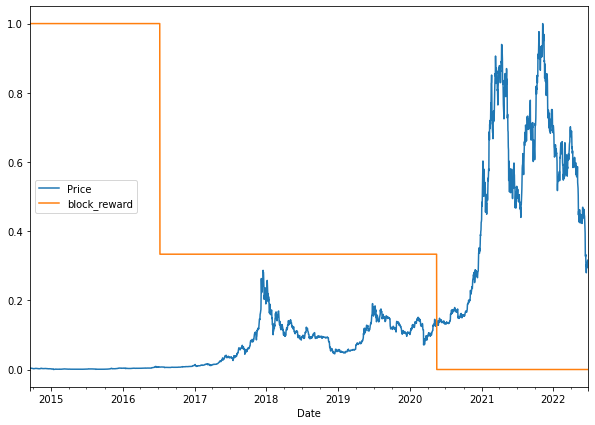

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2022-06-23,21085.876953,6.25,19987.029297,20710.597656,20599.537109,20553.271484,19017.642578,20471.482422,20381.650391
2022-06-24,21231.656250,6.25,21085.876953,19987.029297,20710.597656,20599.537109,20553.271484,19017.642578,20471.482422
2022-06-25,21502.337891,6.25,21231.656250,21085.876953,19987.029297,20710.597656,20599.537109,20553.271484,19017.642578
2022-06-26,21027.294922,6.25,21502.337891,21231.656250,21085.876953,19987.029297,20710.597656,20599.537109,20553.271484
2022-06-27,20735.478516,6.25,21027.294922,21502.337891,21231.656250,21085.876953,19987.029297,20710.597656,20599.537109


In [ ]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [ ]:
y.head()

Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Price, dtype: float32

In [ ]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2267, 2267, 567, 567)

In [ ]:

tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)                          
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 5s - loss: 3133.5801INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 32ms/step - loss: 1858.1099 - val_loss: 4948.5659
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 492.0356INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 467.4945 - val_loss: 2890.6045
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 304.2432INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 280.6074 - val_loss: 2408.6472
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 281.3427INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 265.1744 - val_loss: 2338.6125
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 258.2022 - val_loss: 2364.0828
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 313.2136INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 252.2442 - val_loss: 2250.5603
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 262.5862INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 246.4859 - val_loss: 2216.1931
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 272.0711INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 240.8959 - val_loss: 2172.5190
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 228.8257INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 235.4847 - val_loss: 2117.6936
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 251.8139INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 228.8282 - val_loss: 2053.5864
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 198.0344INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 223.6198 - val_loss: 2001.9453
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 184.3930INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 216.9887 - val_loss: 1945.6389
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 113.4602INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 211.0727 - val_loss: 1837.5797
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 215.9249INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 197.0025 - val_loss: 1785.8434
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 139.5588INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 189.6042 - val_loss: 1715.1890
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 226.5024INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 182.9835 - val_loss: 1660.1475
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 185.2938INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 179.3454 - val_loss: 1657.4880
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 166.2375INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 177.3136 - val_loss: 1652.7994
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 202.8977INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 175.5511 - val_loss: 1545.4873
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 188.9702INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 165.4992 - val_loss: 1506.5942
Epoch 21/100
18/18 [==============================] - 0s 4ms/step - loss: 160.4133 - val_loss: 1565.9689
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 166.8058INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 161.2326 - val_loss: 1448.5508
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 122.4735INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 157.3063 - val_loss: 1430.7393
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 154.0383 - val_loss: 1437.3495
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 157.1062 - val_loss: 1458.8402
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 153.1484INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 153.4603 - val_loss: 1411.9244
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 150.8269 - val_loss: 1600.4799
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 167.4516INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 158.1815 - val_loss: 1371.7006
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 148.6308 - val_loss: 1379.0767
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 157.7150 - val_loss: 1442.0717
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 151.3647 - val_loss: 1372.7802
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 144.2381 - val_loss: 1385.0621
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 145.8381 - val_loss: 1396.6675
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 137.0362INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 151.2931 - val_loss: 1339.1455
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 181.4461INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 144.2527 - val_loss: 1332.2750
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 100.5898INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 145.3628 - val_loss: 1325.1887
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 147.1991 - val_loss: 1374.6658
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 131.6305INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 158.5500 - val_loss: 1317.9578
Epoch 39/100
18/18 [==============================] - 0s 4ms/step - loss: 146.5732 - val_loss: 1360.3003
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 155.2482INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 142.0170 - val_loss: 1310.3298
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 144.1030 - val_loss: 1320.0288
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 151.9712INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 140.3807 - val_loss: 1309.7686
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 141.8607INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 143.2543 - val_loss: 1300.9778
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 151.1547INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 141.8143 - val_loss: 1297.1133
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 142.9085 - val_loss: 1364.3354
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 147.7079 - val_loss: 1332.4608
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 107.5108INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 144.3831 - val_loss: 1293.6166
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 141.6616 - val_loss: 1328.4022
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 143.8672 - val_loss: 1326.1858
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 142.3978 - val_loss: 1312.3242
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 137.1910 - val_loss: 1318.3921
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 141.6702 - val_loss: 1413.0273
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 138.6027 - val_loss: 1293.7421
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 124.5727INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 137.4443 - val_loss: 1289.4664
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 137.5264 - val_loss: 1326.5059
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 160.5413INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 140.3851 - val_loss: 1274.8643
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 149.3003 - val_loss: 1366.2966
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 144.7287 - val_loss: 1320.0675
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 138.2201 - val_loss: 1282.1017
Epoch 60/100
 1/18 [>.............................] - ETA: 0s - loss: 138.0888INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 145.9788 - val_loss: 1270.2388
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 140.7761 - val_loss: 1286.1660
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 136.1338 - val_loss: 1277.8965
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 143.4529 - val_loss: 1379.3107
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 167.9341INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 139.0623 - val_loss: 1265.9474
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 135.5991 - val_loss: 1276.6002
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 143.1317 - val_loss: 1359.4713
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 145.3527 - val_loss: 1306.3926
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 138.0968 - val_loss: 1279.2303
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 136.1896 - val_loss: 1267.5958
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 135.9139 - val_loss: 1266.1666
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 135.7164 - val_loss: 1270.4449
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 137.0861 - val_loss: 1271.5236
Epoch 73/100
18/18 [==============================] - 0s 4ms/step -

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 138.7935 - val_loss: 1261.6216
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 135.8459 - val_loss: 1270.0315
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 136.7929 - val_loss: 1300.0878
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 138.8543 - val_loss: 1276.8085
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 134.8143 - val_loss: 1368.2170
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 141.5143 - val_loss: 1322.9894
Epoch 83/100
 1/18 [>.............................] - ETA: 0s - loss: 144.6622INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 32ms/step - loss: 138.1059 - val_loss: 1258.2195
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 135.0818 - val_loss: 1283.6891
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 137.0835 - val_loss: 1293.5776
Epoch 86/100
16/18 [=========================>....] - ETA: 0s - loss: 137.5139INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 136.6676 - val_loss: 1257.1121
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 136.1551 - val_loss: 1275.8928
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 134.2186 - val_loss: 1272.6210
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 136.8146 - val_loss: 1257.2734
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 134.3220 - val_loss: 1286.5426
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 135.2337 - val_loss: 1262.6687
Epoch 92/100
14/18 [======================>.......] - ETA: 0s - loss: 134.2760INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 58ms/step - loss: 134.7191 - val_loss: 1255.8564
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 136.0106 - val_loss: 1280.4539
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 136.5806 - val_loss: 1256.4960
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 135.2249 - val_loss: 1255.8701
Epoch 96/100
14/18 [======================>.......] - ETA: 0s - loss: 140.2085INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 31ms/step - loss: 137.0079 - val_loss: 1254.3386
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 135.8164 - val_loss: 1259.6019
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 135.3464 - val_loss: 1261.2240
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 137.6582 - val_loss: 1273.5852
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 140.0112 - val_loss: 1257.4216


In [ ]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1257.4216


1257.421630859375

In [ ]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1254.3387


1254.3387451171875

In [ ]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19196.389, 18436.54 , 18543.408, 18307.04 , 18038.7  , 18700.533,
       19152.95 , 19239.295, 19451.824, 21137.96 ], dtype=float32)>

In [ ]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 1254.3386,
 'mape': 2.9906967,
 'mase': 1.0073831,
 'mse': 2956209.0,
 'rmse': 1719.3629}

In [ ]:
model_1_results

{'mae': 1255.2301,
 'mape': 2.9977276,
 'mase': 1.0080991,
 'mse': 2976484.0,
 'rmse': 1725.2489}

##Model 7: N-BEATS algorithm

We're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

To create custom layers and models in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [ ]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast: 1.0071648359298706


We will be following the performance data pipeline in the tensorflow guide: https://www.tensorflow.org/guide/data_performance

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-17,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2267, 2267, 567, 567)

In [ ]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
# Values from N-BEATS paper: https://arxiv.org/pdf/1905.10437.pdf
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4 
N_STACKS = 30 

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE, 
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 387: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1292: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1392: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 4min 15s, sys: 7.53 s, total: 4min 22s
Wall time: 5min 3s


In [ ]:
# Evaluate N-BEats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 20ms/step - loss: 1250.2306


1250.2305908203125

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19263.992, 18357.574, 18551.398, 18296.7  , 18113.998, 18667.602,
       19143.27 , 19253.734, 19366.494, 21208.979], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 1250.2306,
 'mape': 2.990039,
 'mase': 1.0040839,
 'mse': 2957799.2,
 'rmse': 1719.8253}

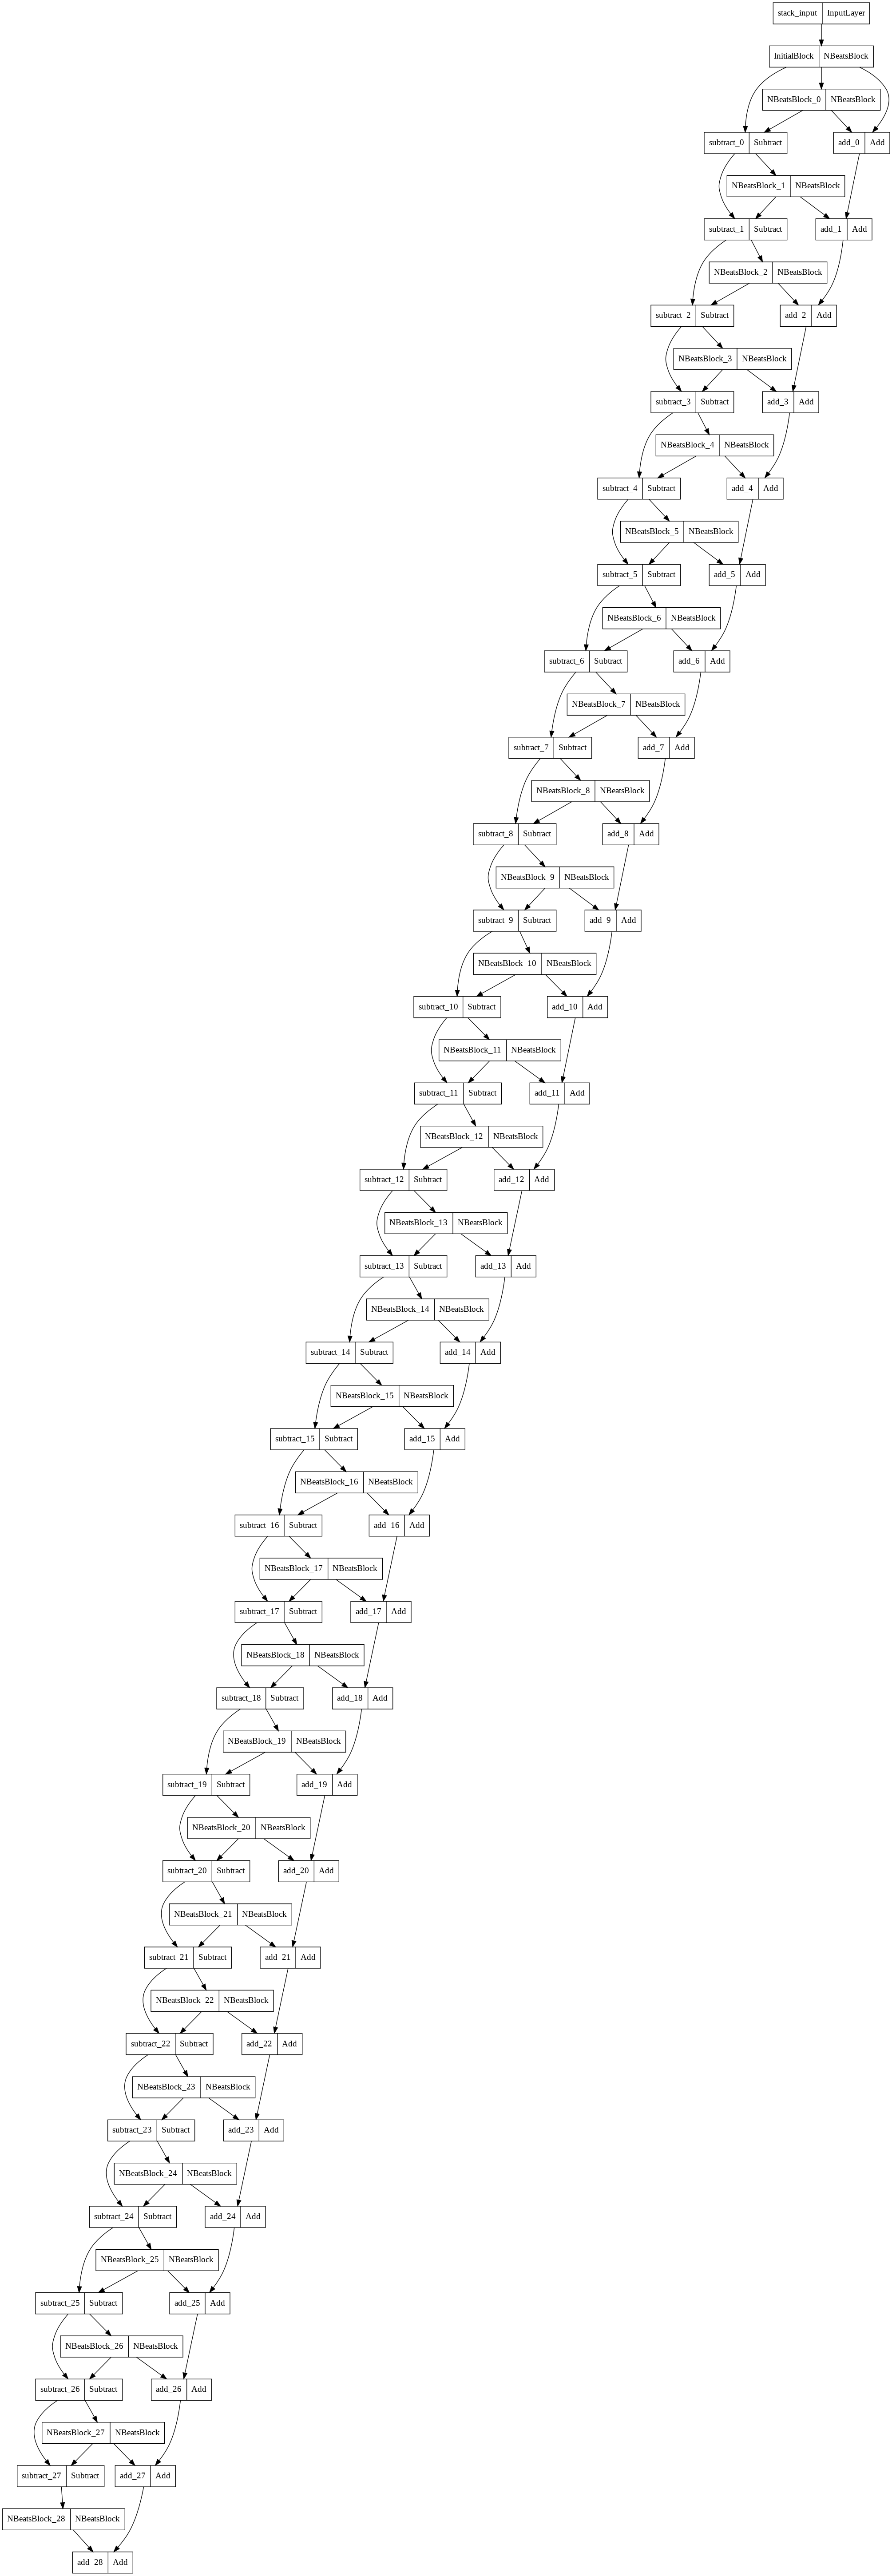

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned: 
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize dense layers with normal distribution for estimating prediction intervals later on
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 494: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 596: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 696: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 308: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 422: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 522: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 307: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 409: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 509: ReduceLROnPl

In [ ]:
ensemble_models

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

In [ ]:
ensemble_preds

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

In [ ]:
model_1_results

**Plotting the prediction intervals (uncertainty estimates) of our ensemble**

There are two major types of uncertainty in machine learning you should know about:

**Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty

**Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly intialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds 
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [ ]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)

In [ ]:
X_test.index[:10]

In [ ]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

##Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset, however, this is only a pseudofuture. Let's now build a model which is capable of predicting into the future!

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed.head()

In [ ]:
bitcoin_prices_windowed.tail()

In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

In [ ]:
X_all[:5], y_all[:5]

In [ ]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimial performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

**Make predictions into future**

In [ ]:
# How many timestesp to predict into the future?
INTO_FUTURE = 30

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE numer of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [ ]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

In [ ]:
future_forecast

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [ ]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

In [ ]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

In [ ]:
bitcoin_prices.index

In [ ]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

In [ ]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

Despite the more recent bitcoin price crashes, our model predicts that it will increase and decrease over the next two weeks. Do we believe this? Let's take a look at the turkey problem.

##Model 10: Why forecasting is unreliable (the turkey problem 🦃)

In [ ]:
# Let's introduce a turkey prolbem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500
                 )

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

In [ ]:
model_1.summary()

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

In [ ]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

In [ ]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

In [ ]:
model_1_results

In [ ]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):], 
                 format="-",
                 label="Turkey Test Data", 
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

#Model Comparison

In [ ]:
ensemble_results

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

In [ ]:
# Sort model results by MAE and plot them 
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");